<h2 style="text-align:center;">A clustering analysis on the USArrests data</h2><br/>
<p><b>Projet Task Description:</b></p>
<p>Description for each task in the clustering analysis on the USArrests data:

<b>Task 1: Hierarchical Clustering with Raw Data</b><br/>
Performed hierarchical clustering using complete linkage and Euclidean distance on the raw crime-related features. The dendrogram was cut to form three distinct clusters. The states within each cluster were identified, and their characteristics were described based on crime rates and urban population percentages.

<b>Task 2: Hierarchical Clustering after Scaling</b><br/>
Repeated hierarchical clustering after scaling the variables to have zero mean and unit standard deviation.

<b>Task 3: PCA and Hierarchical Clustering on Principal Components</b><br/>
Conducted Principal Component Analysis (PCA) on the data and performed hierarchical clustering using the first two principal component score vectors. The dendrogram was cut to form three clusters, and a scatterplot of the first two principal components was presented with different colors for instances in each cluster. Group characteristics were compared with those from Task 2.

<b>Task 4: K-means Clustering with Principal Components</b><br/>
Repeated the analysis using K-means clustering (K=3) with the first two principal component score vectors. The initial centroids were set as group means obtained from hierarchical clustering in Task 3. Compared the results from K-means clustering with hierarchical clustering to determine which method provided a better result.

These tasks aimed to explore different clustering approaches and understand the impact of scaling and dimensionality reduction on the clustering outcomes. The analysis provides insights into the grouping patterns of states based on crime-related features and urban population percentages.</p>


In [90]:
%matplotlib inline

#Load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from tabulate import tabulate
from prettytable import PrettyTable
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


file_path = 'USArrests.csv'

def load_data(file_path):
    # Load and return the dataset
    
    return pd.read_csv(file_path, index_col=0)

def data_visualize(data):
    
    # Display basic information about the dataset
    print(data.info()) 
    # Group the data by 'State' and calculate the count of specific columns
    statewise_totals = data.groupby('State')[['Assault', 'Rape', 'Murder', 'UrbanPop']].sum()

    # Display the state-wise counts
    print("\n Output: State-wise Counts of Assault, Rape, Murder, UrbanPop the percentage of the population living in urban areas:\n")
    print(statewise_totals)


def plot_correlation_heatmap(data):
    # Create a correlation heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()
    
    
    
def clean_data(data):
    # Check for missing values (NaN) in the DataFrame
    missing_values = data.isna().sum()
    print("Missing Values:\n")
    print(missing_values)


def plot_data_scatter(data, x_label, y_label, color_label=None, colormap='viridis', title=None):
    # Create a scatter plot of data 
    plt.figure(figsize=(10, 6))
    if color_label is not None:
        scatter = plt.scatter(data[x_label], data[y_label], c=data[color_label], cmap=colormap, s=50)
        plt.colorbar(scatter, label=color_label)
    else:
        plt.scatter(data[x_label], data[y_label], s=50)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if title:
        plt.title(title)
    plt.show()

def hierarchical_clustering(data, state_labels, num_clusters=3, method='complete', metric='euclidean', plot_dendrogram=True):
    # Perform hierarchical clustering and return cluster labels
    Z = linkage(data, method=method, metric=metric)
    
    if plot_dendrogram:
        plt.figure(figsize=(10, 5))
        dn = dendrogram(Z, color_threshold=num_clusters - 1, labels=state_labels)
        plt.xlabel("States")
        plt.ylabel("Distance")
        plt.title(f'US Arrests Hierarchical Clustering Dendrogram')
        plt.show()
    
    clusters = AgglomerativeClustering(n_clusters=num_clusters, linkage=method, affinity=metric).fit_predict(data)
    return clusters

def calculate_cluster_statistics(data, clusters):
    # Calculate and display statistics for each cluster
    cluster_dict = {}
    
    for cluster_label in np.unique(clusters):
        cluster_data = data[clusters == cluster_label]
        cluster_statistics = cluster_data.describe()
        rounded_statistics = cluster_statistics.round(2)
        cluster_dict[f'Cluster {cluster_label}'] = tabulate(rounded_statistics, headers='keys', tablefmt='pretty')
    
    return cluster_dict

def display_states_by_cluster(data, clusters):
    # Create a dictionary to hold states by cluster label
    cluster_dict = {0: [], 1: [], 2: []}

    # Group data by cluster label
    grouped_data = df_USArrests.groupby(clusters)
    
    # Assign states to corresponding cluster label
    for state, cluster in zip(data.index, clusters):
        cluster_dict[cluster].append(state)

    # Create a new DataFrame to hold the output table
    max_cluster_len = max(len(states) for states in cluster_dict.values())
    columns = [f'Cluster {label}' for label in np.unique(clusters)]

    output_table = pd.DataFrame(index=range(max_cluster_len), columns=columns)

    # Fill in the DataFrame with the states for each cluster
    for i, cluster in enumerate(cluster_dict.values()):
        output_table.iloc[:len(cluster), i] = cluster
    print("Output: States by clusters\n")

    # Print the output table without NaN values
    print(output_table.replace(np.nan, '', regex=True))



def kmeans_clustering(data, num_clusters=3, initial_centroids=None, random_state=5508):
    # Perform K-means clustering and return cluster labels
    kmeans = KMeans(n_clusters=num_clusters, init=initial_centroids, random_state=random_state)
    kmeans.fit(data)
    return kmeans.labels_

def perform_pca(data, num_components=2):
    # Perform PCA and return the first 'num_components' principal components
    pca = PCA(n_components=num_components)
    principal_components = pca.fit_transform(data)
    return principal_components

def plot_pca_scatterplot(principal_components, labels, title):
    # Plot a scatterplot of PCA components with different colors for clusters
    plt.figure(figsize=(8, 6))
    colors = ['r', 'g', 'b']
    for i in range(len(np.unique(labels))):
        plt.scatter(principal_components[labels == i, 0], principal_components[labels == i, 1], c=colors[i], label=f'Cluster {i+1}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.title(title)
    plt.show()

if __name__ == "__main__":
    df_USArrests = load_data(file_path)


In [91]:
# Visualizations
data_visualize(df_USArrests)


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None

 Output: State-wise Counts of Assault, Rape, Murder, UrbanPop the percentage of the population living in urban areas:

                Assault  Rape  Murder  UrbanPop
State                                          
Alabama             236  21.2    13.2        58
Alaska              263  44.5    10.0        48
Arizona             294  31.0     8.1        80
Arkansas            190  19.5     8.8        50
California          276  40.6     9.0        91
Colorado            204  38.7     7.9        78
Connecticut         110  11.1     3.3        77
Delaware            238  15.8     5.9        72
Fl

**Conclusion** <br/>

Here, we observe that our dataset consists of 4 variables and 50 observations.


The output of State-wise Counts of Assault, Rape, Murder, UrbanPop reveals variations in crime rates and urban population percentages across the United States. Notable observations include:

- States like North Carolina and South Carolina have high assault rates.
- Alaska and Nevada exhibit high rates of rape.
- Louisiana and Mississippi stand out with elevated murder rates.
- Urban population percentages vary widely, with the highest in places like California and New Jersey.

This analysis provides a snapshot of crime distribution and urbanization patterns, emphasizing the need for targeted interventions based on regional characteristics.




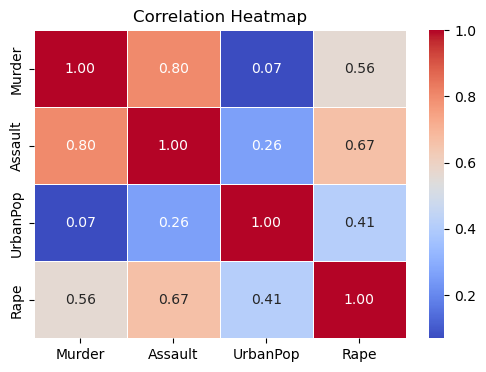

In [92]:
plot_correlation_heatmap(df_USArrests)

**Correlation Heatmap:**<br/>

The correlation heatmap illustrates the relationships between different crime features. Key findings include:

- Positive correlation between assault and murder rates.
- Limited correlation between rape and other crime types.
- Negative correlation between urban population percentage and crime rates in some cases.
  

In [93]:
# Data cleaning
clean_data(df_USArrests)

Missing Values:

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


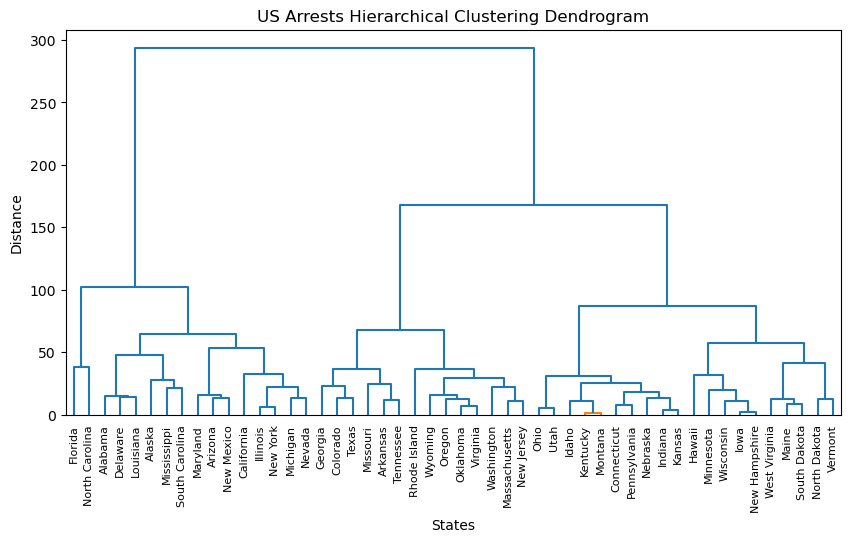

In [94]:

# Task 1: Hierarchical Clustering with Raw Data
clusters_task1 = hierarchical_clustering(df_USArrests.iloc[:, 1:], df_USArrests.index, num_clusters=3)   



In [95]:
# Display states by cluster for Task 1
display_states_by_cluster(df_USArrests, clusters_task1)

Output: States by clusters

         Cluster 0      Cluster 1      Cluster 2
0          Alabama    Connecticut       Arkansas
1           Alaska         Hawaii       Colorado
2          Arizona          Idaho        Georgia
3       California        Indiana  Massachusetts
4         Delaware           Iowa       Missouri
5          Florida         Kansas     New Jersey
6         Illinois       Kentucky       Oklahoma
7        Louisiana          Maine         Oregon
8         Maryland      Minnesota   Rhode Island
9         Michigan        Montana      Tennessee
10     Mississippi       Nebraska          Texas
11          Nevada  New Hampshire       Virginia
12      New Mexico   North Dakota     Washington
13        New York           Ohio        Wyoming
14  North Carolina   Pennsylvania               
15  South Carolina   South Dakota               
16                           Utah               
17                        Vermont               
18                  West Virginia        

In [96]:
# Calculate and display statistics for Task 1 clusters
cluster_statistics_task1 = calculate_cluster_statistics(df_USArrests, clusters_task1)
for cluster, statistics in cluster_statistics_task1.items():
    print(f"{cluster}:\n{statistics}")

Cluster 0:
+-------+--------+---------+----------+-------+
|       | Murder | Assault | UrbanPop | Rape  |
+-------+--------+---------+----------+-------+
| count |  16.0  |  16.0   |   16.0   | 16.0  |
| mean  | 11.81  | 272.56  |  68.31   | 28.38 |
|  std  |  2.8   |  31.05  |  15.49   |  9.6  |
|  min  |  5.9   |  236.0  |   44.0   | 15.8  |
|  25%  |  10.3  | 251.25  |   55.5   | 21.95 |
|  50%  | 11.75  |  261.0  |   71.0   | 26.95 |
|  75%  |  13.5  | 287.25  |  80.25   | 32.85 |
|  max  |  16.1  |  337.0  |   91.0   | 46.0  |
+-------+--------+---------+----------+-------+
Cluster 1:
+-------+--------+---------+----------+-------+
|       | Murder | Assault | UrbanPop | Rape  |
+-------+--------+---------+----------+-------+
| count |  20.0  |  20.0   |   20.0   | 20.0  |
| mean  |  4.27  |  87.55  |  59.75   | 14.39 |
|  std  |  2.3   |  28.16  |  13.92   | 4.67  |
|  min  |  0.8   |  45.0   |   32.0   |  7.3  |
|  25%  |  2.5   |  56.75  |  51.75   | 11.02 |
|  50%  |  3.55  |

**Conclusion**

The hierarchical clustering analysis has revealed distinct patterns in crime rates across different states, leading to the identification of three clusters. Here are key observations for each cluster:

<b>Cluster 0 :</b>

- This cluster comprises states with higher average murder rates (mean: 11.81) and elevated assault rates (mean: 272.56).
- The urban population percentage in this cluster is moderately distributed, with a mean of 68.31.
Notable states in this cluster include Alabama, California, and Florida.

<b>Cluster 1 :</b>

- States in this cluster exhibit lower average murder rates (mean: 4.27) and relatively lower assault rates (mean: 87.55).
- The urban population percentage is diverse, ranging from 32.0 to 83.0, with a mean of 59.75.
Connecticut, Hawaii, and Idaho are among the states in this cluster.

<b>Cluster 2 :</b>

- This cluster consists of states with moderate murder rates (mean: 8.21) and lower assault rates (mean: 173.29).
- The urban population percentage is relatively higher, with a mean of 70.64.
- States like Arkansas, Colorado, and Massachusetts are part of this cluster.

These clusters provide insights into the varying crime landscapes and urbanization patterns across the United States. The analysis aids in categorizing states based on similar crime profiles, contributing to a better understanding of regional differences in law enforcement and societal factors.

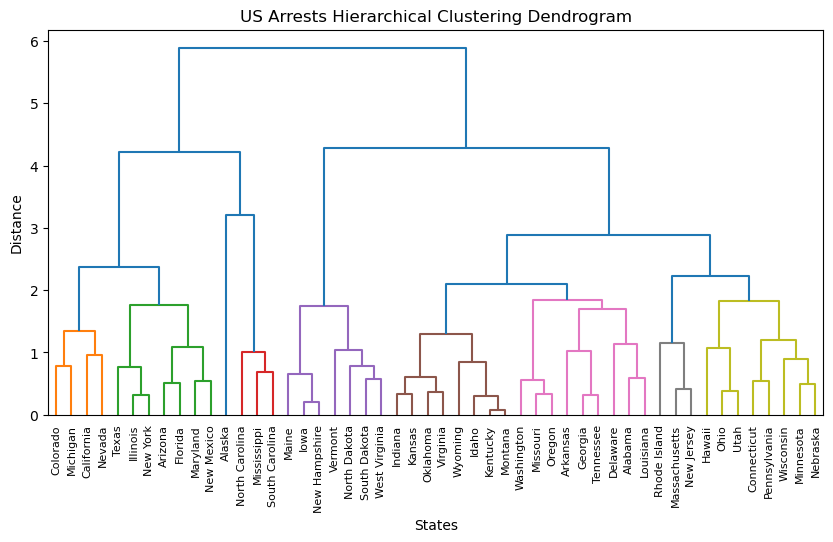

In [97]:
# Task 2: Hierarchical Clustering after Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_USArrests.iloc[:, 1:])
clusters_task2 = hierarchical_clustering(df_scaled, df_USArrests.index, num_clusters=3)

In [99]:
# Display states by cluster for Task 2
display_states_by_cluster(df_USArrests, clusters_task2)


Output: States by clusters

         Cluster 0      Cluster 1      Cluster 2
0           Alaska        Alabama           Iowa
1          Arizona       Arkansas          Maine
2       California    Connecticut  New Hampshire
3         Colorado       Delaware   North Dakota
4          Florida        Georgia   South Dakota
5         Illinois         Hawaii        Vermont
6         Maryland          Idaho  West Virginia
7         Michigan        Indiana               
8      Mississippi         Kansas               
9           Nevada       Kentucky               
10      New Mexico      Louisiana               
11        New York  Massachusetts               
12  North Carolina      Minnesota               
13  South Carolina       Missouri               
14           Texas        Montana               
15                       Nebraska               
16                     New Jersey               
17                           Ohio               
18                       Oklahoma        

In [100]:
# Calculate and display statistics for Task 2 clusters
cluster_statistics_task2 = calculate_cluster_statistics(df_USArrests, clusters_task2)
for cluster, statistics in cluster_statistics_task2.items():
    print(f"{cluster}:\n{statistics}\n")

Cluster 0:
+-------+--------+---------+----------+-------+
|       | Murder | Assault | UrbanPop | Rape  |
+-------+--------+---------+----------+-------+
| count |  15.0  |  15.0   |   15.0   | 15.0  |
| mean  | 11.67  | 269.53  |  70.33   | 30.6  |
|  std  |  2.44  |  38.79  |  16.13   | 9.17  |
|  min  |  7.9   |  201.0  |   44.0   | 16.1  |
|  25%  |  10.2  |  253.0  |   57.5   | 24.75 |
|  50%  |  11.4  |  263.0  |   78.0   | 31.0  |
|  75%  | 12.85  |  289.5  |   80.5   | 36.9  |
|  max  |  16.1  |  337.0  |   91.0   | 46.0  |
+-------+--------+---------+----------+-------+

Cluster 1:
+-------+--------+---------+----------+-------+
|       | Murder | Assault | UrbanPop | Rape  |
+-------+--------+---------+----------+-------+
| count |  28.0  |  28.0   |   28.0   | 28.0  |
| mean  |  6.98  | 144.25  |  67.79   | 19.05 |
|  std  |  3.87  |  52.1   |  10.62   | 5.26  |
|  min  |  2.6   |  46.0   |   50.0   |  8.3  |
|  25%  |  4.22  | 109.75  |   60.0   | 15.75 |
|  50%  |  6.15  

**Conclusion**<br/>
The hierarchical clustering analysis after scaling the data has resulted in three distinct clusters of states based on their crime rates (Murder, Assault, Rape) and the percentage of the population living in urban areas (UrbanPop). Here are the key observations for each cluster:

<b>Cluster 0:</b>
- High crime rates with relatively high Murder, Assault, and Rape.
- High UrbanPop percentage, indicating more urbanized states.

<b>Cluster 1:</b>
- Moderate crime rates with a balanced distribution of Murder, Assault, and Rape.
- Moderate to high UrbanPop percentage, reflecting a mix of urban and suburban states.

<b>Cluster 2:</b>
- Low crime rates with notably low Murder, Assault, and Rape.
- Low UrbanPop percentage, suggesting more rural and less densely populated states.

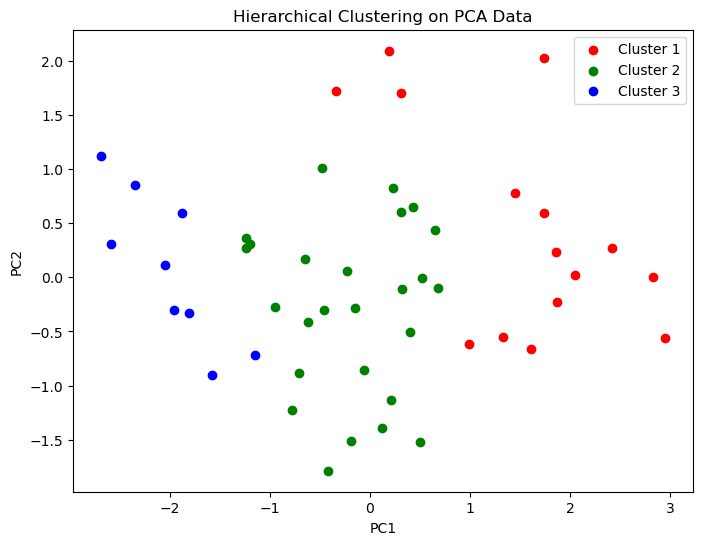

In [101]:
# Task 3: PCA and Hierarchical Clustering with Principal Components
principal_components = perform_pca(df_scaled)
clusters_task3 = hierarchical_clustering(principal_components, df_USArrests.index, num_clusters=3, plot_dendrogram=False)
plot_pca_scatterplot(principal_components, clusters_task3, 'Hierarchical Clustering on PCA Data')

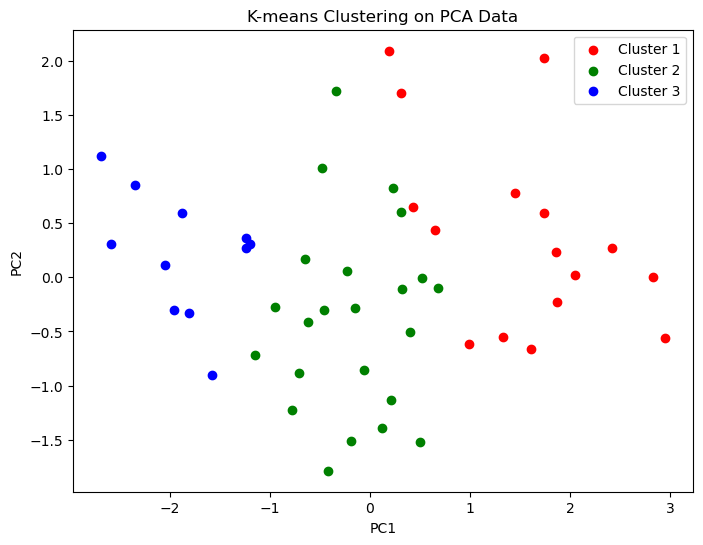

In [102]:
# Task 4: K-means Clustering using K-means with K=3
initial_centroids = np.mean(principal_components[clusters_task3 == 0], axis=0), \
                    np.mean(principal_components[clusters_task3 == 1], axis=0), \
                    np.mean(principal_components[clusters_task3 == 2], axis=0)
clusters_task4 = kmeans_clustering(principal_components, num_clusters=3, initial_centroids=initial_centroids)
plot_pca_scatterplot(principal_components, clusters_task4, 'K-means Clustering on PCA Data')
    

In [103]:
 # Display states by cluster for Task 4
display_states_by_cluster(df_USArrests, clusters_task4)


Output: States by clusters

         Cluster 0      Cluster 1      Cluster 2
0           Alaska        Alabama          Idaho
1          Arizona       Arkansas           Iowa
2       California    Connecticut       Kentucky
3         Colorado       Delaware          Maine
4          Florida         Hawaii        Montana
5          Georgia        Indiana  New Hampshire
6         Illinois         Kansas   North Dakota
7        Louisiana  Massachusetts   South Dakota
8         Maryland      Minnesota        Vermont
9         Michigan    Mississippi  West Virginia
10          Nevada       Missouri      Wisconsin
11      New Mexico       Nebraska               
12        New York     New Jersey               
13  North Carolina           Ohio               
14  South Carolina       Oklahoma               
15           Texas         Oregon               
16                   Pennsylvania               
17                   Rhode Island               
18                      Tennessee        

In [104]:
 # Calculate and display statistics for Task 4 clusters
cluster_statistics_task4 = calculate_cluster_statistics(df_USArrests, clusters_task4)
for cluster, statistics in cluster_statistics_task4.items():
    print(f"{cluster}:\n{statistics}\n")

Cluster 0:
+-------+--------+---------+----------+-------+
|       | Murder | Assault | UrbanPop | Rape  |
+-------+--------+---------+----------+-------+
| count |  16.0  |  16.0   |   16.0   | 16.0  |
| mean  | 11.99  | 265.25  |  71.06   | 30.62 |
|  std  |  2.69  |  40.42  |   14.3   | 8.51  |
|  min  |  7.9   |  201.0  |   45.0   | 16.1  |
|  25%  |  10.3  |  249.0  |   64.5   | 25.12 |
|  50%  | 11.75  |  259.0  |   76.0   | 29.4  |
|  75%  | 13.35  | 287.25  |  80.25   | 36.0  |
|  max  |  17.4  |  337.0  |   91.0   | 46.0  |
+-------+--------+---------+----------+-------+

Cluster 1:
+-------+--------+---------+----------+-------+
|       | Murder | Assault | UrbanPop | Rape  |
+-------+--------+---------+----------+-------+
| count |  23.0  |  23.0   |   23.0   | 23.0  |
| mean  |  6.86  | 149.87  |  69.17   | 19.34 |
|  std  |  3.45  |  51.74  |  11.37   | 5.17  |
|  min  |  2.7   |  46.0   |   44.0   |  8.3  |
|  25%  |  4.35  |  114.0  |   62.5   | 16.05 |
|  50%  |  6.3   

**Conclusion**
- The result obtained from the Hierarchical clustering and K-means  clustering on PCA data revealed similar insights, offering a comprehensive understanding of crime distributions.
- Hence we can conclude that clustering results were consistent across different methodologies, validating the identified patterns.